## Outlier 

> - ### Q. Which Machine LEarning Models Are Sensitive To Outliers?
> 1. Naivye Bayes Classifier--- Not Sensitive To Outliers
> 2. SVM-------- Not Sensitive To Outliers
> 3. Linear Regression---------- Sensitive To Outliers
> 4. Logistic Regression------- Sensitive To Outliers
> 5. Decision Tree Regressor or Classifier---- Not Sensitive
> 6. Ensemble(RF,XGboost,GB)------- Not Sensitive
> 7. KNN--------------------------- Not Sensitive
> 8. Kmeans------------------------ Sensitive
> 9. Hierarichal------------------- Sensitive
> 10. PCA-------------------------- Sensitive
> 11. Neural Networks-------------- Sensitive

> - Importing DataSet

In [8]:
import pandas as pd 
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> - All null values in AGE 

In [7]:
df.Age.isnull().sum()

177

> - Plotting null value

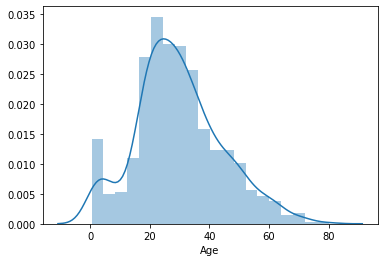

In [9]:
sns.distplot(df.Age.dropna())

> - Plotting null value with 100

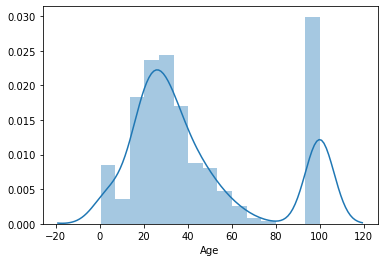

In [10]:
sns.distplot(df.Age.fillna(100))

> - Histogram of Age

Text(0, 0.5, 'No of Passengers')

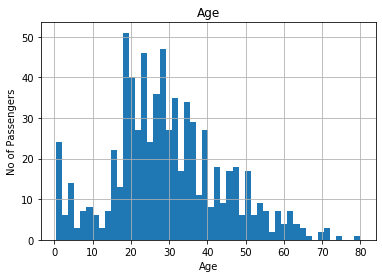

In [12]:
figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

> - When Data is normally distributed / Gaussian

> - #### Gaussian Distribution

> - Box plot to see Outliers

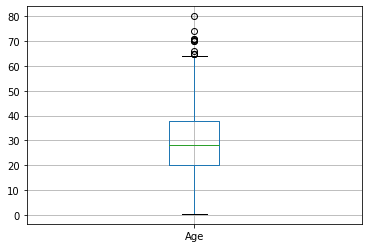

In [14]:
figure = df.boxplot(column = 'Age')

> - Upper Bound, Mean and Lower Bound of Data With respect to age

In [16]:
upper_bound = df.Age.mean() + 3 * df.Age.std()
lower_bound = df.Age.mean() - 3 * df.Age.std()
print(lower_bound), print(df['Age'].mean()), print(upper_bound)

-13.88037434994331
29.69911764705882
73.27860964406095


(None, None, None)

> - ##### Skewed Data

Text(0, 0.5, 'No of passenger')

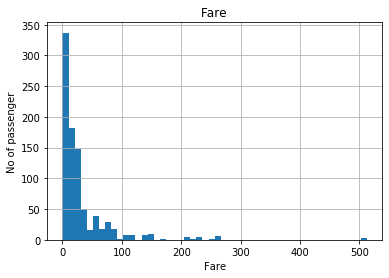

In [26]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

> - Box plot to see outlier

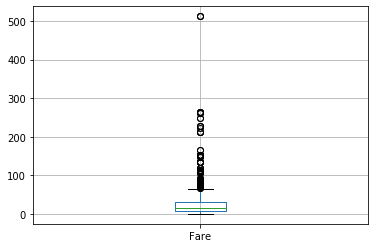

In [27]:
figure=df.boxplot(column="Fare")

> - Finding OutLiers

In [28]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

> - Normal value

In [29]:
lower_bridge = df.Age.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.Age.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

-14.5094 72.6344


> - Extreme Value

In [30]:
lower_bridge = df.Age.quantile(0.25) - (IQR * 3)
upper_bridge = df.Age.quantile(0.75) + (IQR * 3)
print(lower_bridge, upper_bridge)

-49.1438 107.2688


> - How to use values we obtained

In [33]:
data = df.copy()

> - Replacing outliers with extreme 

In [34]:
data.loc[data['Age'] >= 73, 'Age'] = 73
data.loc[data['Fare'] >= 107, 'Fare'] = 107

> - Seeing New Data

Text(0, 0.5, 'No of passenger')

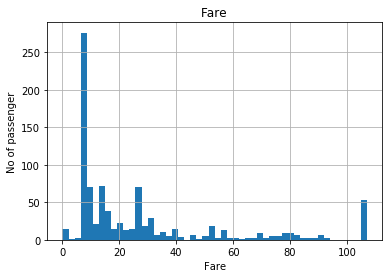

In [35]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

> - Using Algo

> - Making Training and Testing Data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], stest_size=0.3)

> - Applying Logistic Regressions 

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

> - Results of Logistic Regression

In [38]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score: 0.7014925373134329
roc_auc_score: 0.7353708424734688


> - Appling Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.6918539159305153
